In [126]:
import pandas as pd
import graphviz 
from sklearn import tree
import csv

# 1. Prepare data

In [127]:
project_path = "/home/rorubyy/Documents/PythonWorkspace/weatherAnalytics"
train_data_path = str(project_path + "/train.csv")
test_data_path = str(project_path + "/test.csv")
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

1.1 將資料有缺失的列都刪除，避免資料不足難以預測結果。

In [128]:
# drop null data
train = train.dropna(how='any')

1.2 我認為日期、地點不是影響明日是否降雨的因素，因此將這兩個欄位移除。此外，風向式利用文字描述難以轉換成數字，暫不考慮，同樣也將之移除。

In [129]:
# drop location, date, wind
drop_columns_list = ['Attribute1', 'Attribute2','Attribute8','Attribute10']
train = train.drop(drop_columns_list, axis=1)
test = test.drop(drop_columns_list, axis=1)


1.3 降雨與否原本是用yes/no組成，將其轉換為數字1/0

In [130]:
# change yes/no to 1/0
train['Attribute16'].replace({'No':0,'Yes':1},inplace=True)
train['Attribute17'].replace({'No':0,'Yes':1},inplace=True)

test['Attribute16'].replace({'No':0,'Yes':1},inplace=True)

In [131]:
#Task: Split the data into train and test
train_y = train['Attribute17']
train_x = train.drop(['Attribute17'], axis=1)

test_x = test

# 2. Model 
## Decision Tree

使用Decision Tree預測明日降雨結果，depth設定為7

In [147]:
dtree=tree.DecisionTreeClassifier(max_depth=7)
dtree=dtree.fit(train_x,train_y)
dot_data = tree.export_graphviz(dtree, 
                filled=True, 
                feature_names=list(train_x),
                class_names=['No rain','rain'],
                special_characters=True)
graph = graphviz.Source(dot_data)  

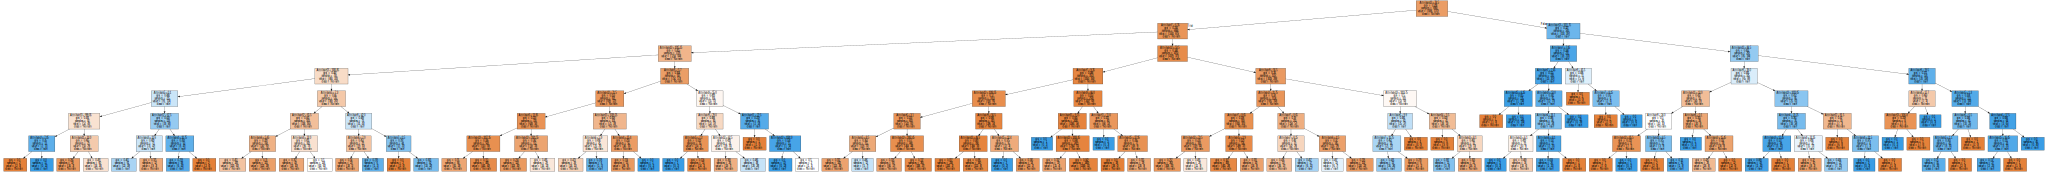

In [148]:
graph

顯示不同資料與結果之間的關聯性

In [149]:
dtree.feature_importances_

array([0.02839163, 0.02467791, 0.04897069, 0.02754288, 0.15663817,
       0.07480246, 0.0108808 , 0.49618626, 0.11577613, 0.00533091,
       0.01080215, 0.        ])

把訓練好的模型套用到測試數據

In [150]:
predict_y = dtree.predict(test_x)

In [151]:
predict_y 

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# 3. Result 

把結果寫進csv檔裡

In [155]:
file = open('result.csv',mode='w', newline='')
writer = csv.writer(file)
writer.writerow(['id','ans'])
for idx, x in enumerate(predict_y):
    idx=float(idx)
    writer.writerow([idx,x])